<a href="https://colab.research.google.com/github/juliandavidolaya/Proyecto-IA/blob/main/03_Modelos_e_iteraciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importamos el dataset de training##

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/IsaParejaGil/training-data/main/training.csv'
df = pd.read_csv(url)
df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


Exploramos el tamaño del dataset

In [ ]:
df.shape

(72983, 34)

# Data cleaning #

In [ ]:
d1 = df.copy()

In [ ]:
k = df.isna().sum()
print(k[k!=0])

Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanPrice            315
MMRCurrentRetailAveragePrice           315
MMRCurrentRetailCleanPrice             315
PRIMEUNIT                            69564
AUCGUART                             69564
dtype: int64


##Eliminación de columnas##

- **PRIMEUNIT,AUCGUART** , se eliminana dada la cantidad de datos faltantes que ellas tienen como se observó el gráfico de nulos. 
- **WheelType**, nos da la misma información de WheelTypeID
- **BYRNO**, número asignado al comprador del vehículo, no es importante en nuestro estudio
- **VehYear** es similar a **VehiceAge**
- Por el principio de parsimonia, eliminamos **Trim**, **Model** y **SubModel**
- Tampoco necesitamos **RefId** 
-**PurchDate** no nos provee información valiosa.
- **VNST** and **VNZIP** - Estado and código postal del vehículo, lo cual tampoco provee información importante para la determinación de una buena o mala compra. 

In [ ]:
d1.drop(['PRIMEUNIT'], axis=1,inplace=True)
d1.drop(['AUCGUART'], axis=1,inplace=True)
d1.drop(['WheelType'], axis=1,inplace=True)
d1.drop(['BYRNO'], axis=1,inplace=True)
d1.drop(['VehYear'], axis=1,inplace=True)
d1.drop(['Trim'],axis = 1, inplace = True)
d1.drop(['Model'], axis = 1, inplace = True)
d1.drop(['SubModel'],axis=1,inplace=True)
d1.drop(['RefId'],axis=1,inplace=True)
d1.drop(['PurchDate'],axis=1,inplace=True)
d1.drop(['VNST'],axis=1,inplace=True)
d1.drop(['VNZIP1'],axis=1,inplace=True)
d1.drop(['Color'],axis=1,inplace=True)

## Imputación de columnas numéricas ##

In [ ]:
numeric_valuesd1 = d1._get_numeric_data().describe().T
numeric_valuesd1

,count,mean,std,min,25%,50%,75%,max
IsBadBuy,72983.0,0.122988,0.328425,0.0,0.0,0.0,0.0,1.0
VehicleAge,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
WheelTypeID,69814.0,1.494299,0.521290,0.0,1.0,1.0,2.0,3.0
VehOdo,72983.0,71499.995917,14578.913128,4825.0,61837.0,73361.0,82436.0,115717.0
MMRAcquisitionAuctionAveragePrice,72965.0,6128.909217,2461.992768,0.0,4273.0,6097.0,7765.0,35722.0
MMRAcquisitionAuctionCleanPrice,72965.0,7373.636031,2722.491986,0.0,5406.0,7303.0,9021.0,36859.0
MMRAcquisitionRetailAveragePrice,72965.0,8497.034332,3156.285284,0.0,6280.0,8444.0,10651.0,39080.0
MMRAcquisitonRetailCleanPrice,72965.0,9850.928240,3385.789541,0.0,7493.0,9789.0,12088.0,41482.0
MMRCurrentAuctionAveragePrice,72668.0,6132.081287,2434.567723,0.0,4275.0,6062.0,7736.0,35722.0
MMRCurrentAuctionCleanPrice,72668.0,7390.681827,2686.248852,0.0,5414.0,7313.0,9013.0,36859.0


**MMRAcquisitionAuctionAveragePrice**

In [ ]:
mmra1 = round(d1['MMRAcquisitionAuctionAveragePrice'].mean(),2)
d1.loc[d1['MMRAcquisitionAuctionAveragePrice'].isna(),'MMRAcquisitionAuctionAveragePrice'] = mmra1
print(mmra1)

6128.91


**MMRAcquisitionAuctionCleanPrice**

In [ ]:
mmra2 = round(d1['MMRAcquisitionAuctionCleanPrice'].mean(),2)
d1.loc[d1['MMRAcquisitionAuctionCleanPrice'].isna(),'MMRAcquisitionAuctionCleanPrice'] = mmra2

**MMRAcquisitionRetailAveragePrice**

In [ ]:
mmra3 = round(d1['MMRAcquisitionRetailAveragePrice'].mean(),2)
d1.loc[d1['MMRAcquisitionRetailAveragePrice'].isna(),'MMRAcquisitionRetailAveragePrice'] = mmra3

**MMRAcquisitonRetailCleanPrice**

In [ ]:
mmra4 = round(d1['MMRAcquisitonRetailCleanPrice'].mean(),2)
d1.loc[d1['MMRAcquisitonRetailCleanPrice'].isna(),'MMRAcquisitonRetailCleanPrice'] = mmra4

**MMRCurrentAuctionAveragePrice**

In [ ]:
mmra5 = round(d1['MMRCurrentAuctionAveragePrice'].mean(),2)
d1.loc[d1['MMRCurrentAuctionAveragePrice'].isna(),'MMRCurrentAuctionAveragePrice'] = mmra5

**MMRCurrentAuctionCleanPrice**

In [ ]:
mmra6 = round(d1['MMRCurrentAuctionCleanPrice'].mean(),2)
d1.loc[d1['MMRCurrentAuctionCleanPrice'].isna(),'MMRCurrentAuctionCleanPrice'] = mmra6

**MMRCurrentRetailAveragePrice**

In [ ]:
mmra7 = round(d1['MMRCurrentRetailAveragePrice'].mean(),2)
d1.loc[d1['MMRCurrentRetailAveragePrice'].isna(),'MMRCurrentRetailAveragePrice'] = mmra7

**MMRCurrentRetailCleanPrice**

In [ ]:
mmra8 = round(d1['MMRCurrentRetailCleanPrice'].mean(),2)
d1.loc[d1['MMRCurrentRetailCleanPrice'].isna(),'MMRCurrentRetailCleanPrice'] = mmra8

**VehBCost**

In [ ]:
vehbcost_mean = round(d1['VehBCost'].mean(),2)
d1.loc[d1['VehBCost'].isna(),'VehBCost'] = vehbcost_mean

**IsOnlineSale**

In [ ]:
d1.loc[d1['IsOnlineSale'].isna(),'IsOnlineSale'] = np.random.randint(0,2)

**WarrantyCost**

In [ ]:
warranty_mean = round(d1['WarrantyCost'].mean(),2)
d1.loc[d1['WarrantyCost'].isna(),'WarrantyCost'] = warranty_mean

**WheelTypeID**

In [ ]:
wheel_empty_values = 0
d1.loc[d1['WheelTypeID'].isna(),'WheelTypeID'] = wheel_empty_values

In [ ]:
d1

,IsBadBuy,Auction,VehicleAge,Make,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,...,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,0,ADESA,3,MAZDA,AUTO,1.0,89046,OTHER ASIAN,MEDIUM,OTHER,...,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,7100.0,0,1113.0
1,0,ADESA,5,DODGE,AUTO,1.0,93593,AMERICAN,LARGE TRUCK,CHRYSLER,...,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,7600.0,0,1053.0
2,0,ADESA,4,DODGE,AUTO,2.0,73807,AMERICAN,MEDIUM,CHRYSLER,...,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,0,1389.0
3,0,ADESA,5,DODGE,AUTO,1.0,65617,AMERICAN,COMPACT,CHRYSLER,...,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,0,630.0
4,0,ADESA,4,FORD,MANUAL,2.0,69367,AMERICAN,COMPACT,FORD,...,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,0,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,ADESA,8,MERCURY,AUTO,1.0,45234,AMERICAN,MEDIUM,FORD,...,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,4200.0,0,993.0
72979,0,ADESA,2,CHEVROLET,AUTO,0.0,71759,AMERICAN,MEDIUM,GM,...,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,6200.0,0,1038.0
72980,0,ADESA,4,JEEP,AUTO,1.0,88500,AMERICAN,MEDIUM SUV,CHRYSLER,...,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,8200.0,0,1893.0
72981,0,ADESA,3,CHEVROLET,AUTO,1.0,79554,AMERICAN,LARGE,GM,...,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,7000.0,0,1974.0


##Imputación de datos categóricos##

In [ ]:
k = d1.isna().sum()
print(k[k!=0])

Transmission            9
Nationality             5
Size                    5
TopThreeAmericanName    5
dtype: int64


In [ ]:
object_cols = d1.select_dtypes(include='object')
display(object_cols.head())

,Auction,Make,Transmission,Nationality,Size,TopThreeAmericanName
0,ADESA,MAZDA,AUTO,OTHER ASIAN,MEDIUM,OTHER
1,ADESA,DODGE,AUTO,AMERICAN,LARGE TRUCK,CHRYSLER
2,ADESA,DODGE,AUTO,AMERICAN,MEDIUM,CHRYSLER
3,ADESA,DODGE,AUTO,AMERICAN,COMPACT,CHRYSLER
4,ADESA,FORD,MANUAL,AMERICAN,COMPACT,FORD




Haremos uso de la imputación de la moda que consiste en el reemplazo de valores faltantes por los valores de la moda, es decir, con la observación más común

In [ ]:

moda_auction = d1['Auction'].value_counts().idxmax()
d1.loc[d1['Auction'].isna(),'Auction'] = moda_auction

moda_make = d1['Make'].value_counts().idxmax()
d1.loc[d1['Make'].isna(),'Make'] = moda_make

moda_transmission = d1['Transmission'].value_counts().idxmax()
d1.loc[d1['Transmission'].isna(),'Transmission'] = moda_transmission

moda_nationality = d1['Nationality'].value_counts().idxmax()
d1.loc[d1['Nationality'].isna(),'Nationality'] = moda_nationality

moda_size = d1['Size'].value_counts().idxmax()
d1.loc[d1['Size'].isna(),'Size'] = moda_size

moda_top3 = d1['TopThreeAmericanName'].value_counts().idxmax()
d1.loc[d1['TopThreeAmericanName'].isna(),'TopThreeAmericanName'] = moda_top3


# Training dataset después del datacleaning

Para terminar con la limpieza de los datos, convertimos las columnas que están con tipo de dato `float` a `int`, dado que en la base de datos original están como enteros. 

In [ ]:
d1['WheelTypeID'] = d1['WheelTypeID'].astype(int)
d1

tipos = d1.dtypes
nombres = []
for i,j in zip(tipos.index.values,tipos.values):
  if j == "float64":
    nombres.append(i)

for i in nombres:
  d1[i] = d1[i].astype(int)

Adicionalmente, observamos que la columna `Transmission` tiene MANUAL y Manual, lo cual puede generarnos problemas más adelante. 

In [ ]:
d1['Transmission'].unique()

array(['AUTO', 'MANUAL', 'Manual'], dtype=object)

In [ ]:
d1
d1["Transmission"].replace("Manual", "MANUAL", inplace=True)

In [ ]:
d1.isnull().sum()

IsBadBuy                             0
Auction                              0
VehicleAge                           0
Make                                 0
Transmission                         0
WheelTypeID                          0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

# One hot encoding para variables categóricas

In [ ]:
object_cols = d1.select_dtypes(include='object')
display(object_cols.head())


,Auction,Make,Transmission,Nationality,Size,TopThreeAmericanName
0,ADESA,MAZDA,AUTO,OTHER ASIAN,MEDIUM,OTHER
1,ADESA,DODGE,AUTO,AMERICAN,LARGE TRUCK,CHRYSLER
2,ADESA,DODGE,AUTO,AMERICAN,MEDIUM,CHRYSLER
3,ADESA,DODGE,AUTO,AMERICAN,COMPACT,CHRYSLER
4,ADESA,FORD,MANUAL,AMERICAN,COMPACT,FORD


In [ ]:
dftrain= pd.get_dummies(d1)
dftrain
dftrain.drop(['Make_HUMMER', 'Make_PLYMOUTH', 'Make_TOYOTA SCION'], axis=1, inplace=True)
dftrain


,IsBadBuy,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER
0,0,3,1,89046,8155,9829,11636,13600,7451,8552,...,0,0,0,0,0,0,0,0,0,1
1,0,5,1,93593,6854,8383,10897,12572,7456,9222,...,0,0,0,0,0,0,1,0,0,0
2,0,4,2,73807,3202,4760,6943,8457,4035,5557,...,0,0,0,0,0,0,1,0,0,0
3,0,5,1,65617,1893,2675,4658,5690,1844,2646,...,0,0,0,0,0,0,1,0,0,0
4,0,4,2,69367,3913,5054,7723,8707,3247,4384,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,8,1,45234,1996,2993,2656,3732,2190,3055,...,0,0,0,0,0,0,0,1,0,0
72979,0,2,0,71759,6418,7325,7431,8411,6785,8132,...,0,0,0,0,0,0,0,0,1,0
72980,0,4,1,88500,8545,9959,9729,11256,8375,9802,...,1,0,0,0,0,0,1,0,0,0
72981,0,3,1,79554,6420,7604,7434,8712,6590,7684,...,0,0,0,0,0,0,0,0,1,0


#Testing

In [ ]:
urltest = 'https://raw.githubusercontent.com/EstebanCaroP/hello-world/main/test.csv'
dftest = pd.read_csv(urltest)
dftest

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,...,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,...,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,...,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,...,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,...,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,11/17/2010,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,...,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633
48703,121743,11/17/2010,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,...,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594
48704,121744,11/17/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,...,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594
48705,121745,11/17/2010,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,...,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038


## Imputación datos numéricos

In [ ]:
# Eliminar columnas en dftest
dftest.drop(['PRIMEUNIT'], axis=1, inplace=True)
dftest.drop(['AUCGUART'], axis=1, inplace=True)
dftest.drop(['WheelType'], axis=1, inplace=True)
dftest.drop(['BYRNO'], axis=1, inplace=True)
dftest.drop(['VehYear'], axis=1, inplace=True)
dftest.drop(['Trim'], axis=1, inplace=True)
dftest.drop(['Model'], axis=1, inplace=True)
dftest.drop(['SubModel'], axis=1, inplace=True)
dftest.drop(['RefId'], axis=1, inplace=True)
dftest.drop(['PurchDate'], axis=1, inplace=True)
dftest.drop(['VNST'], axis=1, inplace=True)
dftest.drop(['VNZIP1'], axis=1, inplace=True)
dftest.drop(['Color'], axis=1, inplace=True)

mmra1 = round(dftest['MMRAcquisitionAuctionAveragePrice'].mean(),2)
dftest.loc[dftest['MMRAcquisitionAuctionAveragePrice'].isna(),'MMRAcquisitionAuctionAveragePrice'] = mmra1

mmra2 = round(dftest['MMRAcquisitionAuctionCleanPrice'].mean(),2)
dftest.loc[dftest['MMRAcquisitionAuctionCleanPrice'].isna(),'MMRAcquisitionAuctionCleanPrice'] = mmra2

mmra3 = round(dftest['MMRAcquisitionRetailAveragePrice'].mean(),2)
dftest.loc[dftest['MMRAcquisitionRetailAveragePrice'].isna(),'MMRAcquisitionRetailAveragePrice'] = mmra3

mmra4 = round(dftest['MMRAcquisitonRetailCleanPrice'].mean(),2)
dftest.loc[dftest['MMRAcquisitonRetailCleanPrice'].isna(),'MMRAcquisitonRetailCleanPrice'] = mmra4

mmra5 = round(dftest['MMRCurrentAuctionAveragePrice'].mean(),2)
dftest.loc[dftest['MMRCurrentAuctionAveragePrice'].isna(),'MMRCurrentAuctionAveragePrice'] = mmra5

mmra6 = round(dftest['MMRCurrentAuctionCleanPrice'].mean(),2)
dftest.loc[dftest['MMRCurrentAuctionCleanPrice'].isna(),'MMRCurrentAuctionCleanPrice'] = mmra6

mmra7 = round(dftest['MMRCurrentRetailAveragePrice'].mean(),2)
dftest.loc[dftest['MMRCurrentRetailAveragePrice'].isna(),'MMRCurrentRetailAveragePrice'] = mmra7

mmra8 = round(dftest['MMRCurrentRetailCleanPrice'].mean(),2)
dftest.loc[dftest['MMRCurrentRetailCleanPrice'].isna(),'MMRCurrentRetailCleanPrice'] = mmra8

vehbcost_mean = round(dftest['VehBCost'].mean(),2)
dftest.loc[dftest['VehBCost'].isna(),'VehBCost'] = vehbcost_mean

dftest.loc[dftest['IsOnlineSale'].isna(),'IsOnlineSale'] = np.random.randint(0,2)

warranty_mean = round(dftest['WarrantyCost'].mean(),2)
dftest.loc[dftest['WarrantyCost'].isna(),'WarrantyCost'] = warranty_mean

wheel_empty_values = 0
dftest.loc[dftest['WheelTypeID'].isna(),'WheelTypeID'] = wheel_empty_values

In [ ]:
dftest

,Auction,VehicleAge,Make,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,ADESA,4,PONTIAC,AUTO,1.0,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,6500.0,0,2152.0
1,ADESA,4,CHEVROLET,AUTO,1.0,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,6300.0,0,1118.0
2,ADESA,3,DODGE,AUTO,1.0,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,9700.0,0,1215.0
3,ADESA,7,SATURN,AUTO,1.0,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,4150.0,0,1933.0
4,ADESA,2,HYUNDAI,AUTO,0.0,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,4100.0,0,920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,MANHEIM,5,FORD,AUTO,1.0,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,7955.0,0,1633.0
48703,MANHEIM,3,TOYOTA,AUTO,2.0,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,7035.0,0,594.0
48704,MANHEIM,4,KIA,AUTO,2.0,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,6335.0,0,594.0
48705,MANHEIM,5,MAZDA,AUTO,1.0,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,8055.0,0,1038.0


## Imputación datos categóricos

In [ ]:


moda_auction = dftest['Auction'].value_counts().idxmax()
dftest.loc[dftest['Auction'].isna(),'Auction'] = moda_auction

moda_make = dftest['Make'].value_counts().idxmax()
dftest.loc[dftest['Make'].isna(),'Make'] = moda_make

moda_transmission = dftest['Transmission'].value_counts().idxmax()
dftest.loc[dftest['Transmission'].isna(),'Transmission'] = moda_transmission

moda_nationality = dftest['Nationality'].value_counts().idxmax()
dftest.loc[dftest['Nationality'].isna(),'Nationality'] = moda_nationality

moda_size = dftest['Size'].value_counts().idxmax()
dftest.loc[dftest['Size'].isna(),'Size'] = moda_size

moda_top3 = dftest['TopThreeAmericanName'].value_counts().idxmax()
dftest.loc[dftest['TopThreeAmericanName'].isna(),'TopThreeAmericanName'] = moda_top3


In [ ]:
dftest['WheelTypeID'] = dftest['WheelTypeID'].astype(int)
dftest

tipos = dftest.dtypes
nombres = []
for i,j in zip(tipos.index.values,tipos.values):
  if j == "float64":
    nombres.append(i)

for i in nombres:
  dftest[i] = dftest[i].astype(int)

In [ ]:
dftest = pd.get_dummies(dftest)
dftest

,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,...,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER
0,4,1,85377,5032,6386,5935,7397,4905,6181,8557,...,0,0,0,0,0,0,0,0,1,0
1,4,1,61873,4502,5685,5362,6640,4645,5710,7562,...,0,0,0,0,0,0,0,0,1,0
2,3,1,69283,10244,13041,11564,14584,10883,12166,15340,...,1,0,0,0,0,0,1,0,0,0
3,7,1,87889,2558,3542,3263,4325,2928,3607,5725,...,0,0,0,0,0,0,0,0,1,0
4,2,0,73432,5013,6343,5914,7350,5013,6343,5914,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,5,1,88645,5358,6836,8987,10905,5761,6965,9764,...,0,0,0,0,0,0,0,1,0,0
48703,3,2,81862,6849,7992,10999,12021,6856,8183,10283,...,0,0,0,0,0,0,0,0,0,1
48704,4,2,82451,4662,5655,7972,9670,4833,5856,7871,...,0,0,0,0,0,0,0,0,0,1
48705,5,1,75760,5953,8166,9137,11949,5092,6853,8576,...,0,0,0,0,0,0,0,0,0,1


#Verificación de dimensiones dftrain y dftest

In [ ]:
columnas_df1 = dftrain.columns
columnas_df2 = dftest.columns

diferentes = set(columnas_df1) - set(columnas_df2) | set(columnas_df2) - set(columnas_df1)
display(diferentes)


{'IsBadBuy'}

# Métodos supervisados

Partición de los datos 

In [ ]:
X_train = dftrain.drop([ 'IsBadBuy'], axis=1)
y_train = dftrain['IsBadBuy']
X_test = dftest
display(X_test.shape)
display(X_train.shape)

(48707, 69)

(72983, 69)

In [ ]:
from sklearn.model_selection import train_test_split

test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación

print (X_train.shape, y_train.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtv, ytv son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que se usan para probar el modelo 
Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)
print (Xtv.shape, xts.shape)

(72983, 69) (72983,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(51088, 69) (15327, 7)


Selección de modelos 

##Regresión Logística 

Iteración 1 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(Xtv,ytv)
lr.score(Xtv,ytv)
y_pred = lr.predict(Xtv)
acc = accuracy_score(y_pred,ytv)

print(round(acc*100,4))

88.0489


Iteración 2

In [ ]:
# Esta celda puede tomar un tiempo considerable en ejecutarse 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()

param_grid = {
    'penalty': ['l1','l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(Xtv, ytv)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", best_params)
print("Mejor puntaje:", grid_search.best_score_)


Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor puntaje: 0.8767029448058746


In [ ]:
Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)
lr = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
lr.fit(Xtv,ytv)
lr.score(Xtv,ytv)
y_pred = lr.predict(Xtv)
acc = accuracy_score(y_pred,ytv)

print(round(acc*100,4))


88.3965


## Árbol de decisión 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(class_weight='balanced')
decision_tree.fit(Xtv, ytv)
y_pred = decision_tree.predict(Xtv)

# Calculamos  el accuracy
accuracy = accuracy_score(y_pred, ytv)
print(accuracy)


1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier()
# Defini los hiperparámetros a probar
parameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(decision_tree, parameters, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)



{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8979217349702248


In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=2)
decision_tree.fit(Xtv, ytv)
y_pred = decision_tree.predict(Xtv)

# Calculamos  el accuracy
accuracy = accuracy_score(y_pred, ytv)
print(decision_tree.score(Xtv,ytv))

0.8772118697150015


# Métodos no supervisados

## PCA + Regresión logística

In [ ]:
from sklearn.decomposition import PCA
components = [1,2,3,5,7,9]
test_size = 0.3
val_size  = test_size/(1-test_size)
perf = [] 
lr = LogisticRegression(class_weight='balanced')
for i in components:
    pca = PCA(n_components = i)
    X_t = pca.fit_transform(X_train)
    Xtv, Xts, ytv, yts = train_test_split(X_t, y_train, test_size=test_size)
    
    lr.fit(Xtv, ytv)
    perf.append(accuracy_score(yts , lr.predict(Xts)))
    print('Accuracy del modelo con ', i ,'elementos: ',"{:.5f}".format(accuracy_score(ytv , lr.predict(Xtv))))
    print('------------')

Accuracy del modelo con  1 elementos:  0.48256
------------
Accuracy del modelo con  2 elementos:  0.54212
------------
Accuracy del modelo con  3 elementos:  0.54013
------------
Accuracy del modelo con  5 elementos:  0.53837
------------
Accuracy del modelo con  7 elementos:  0.53402
------------
Accuracy del modelo con  9 elementos:  0.53014
------------


Iteración 1

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)

pca = PCA(n_components = 2)
X_t1 = pca.fit_transform(X_train)
Xtv, Xts, ytv, yts = train_test_split(X_t1, y_train, test_size=test_size)
# Crea una instancia de PCA
pca = PCA(n_components=2)
logistic_regression = LogisticRegression(class_weight='balanced')
pipeline = Pipeline([('pca', pca), ('logistic_regression', logistic_regression)])
pipeline.fit(Xtv, ytv)
y_pred = pipeline.predict(Xtv)

accuracy = accuracy_score(y_pred,ytv)

print(accuracy)


0.5413991544002505


Iteración 2

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)


pca = PCA(n_components = 2)
X_t1 = pca.fit_transform(X_train)
Xtv, Xts, ytv, yts = train_test_split(X_t1, y_train, test_size=test_size)
# Crea una instancia de PCA
pca = PCA(n_components=2)

# Crea una instancia de Regresión Logística
logistic_regression = LogisticRegression(max_iter=120,solver='liblinear',class_weight='balanced')

# Crea un pipeline que combine PCA y Regresión Logística
pipeline = Pipeline([('pca', pca), ('logistic_regression', logistic_regression)])

# Ajusta el pipeline a tus datos de entrenamiento
pipeline.fit(Xtv, ytv)

# Realiza predicciones en los datos de prueba
y_pred = pipeline.predict(Xtv)

# Calcula la precisión de la clasificación
accuracy = accuracy_score(y_pred,ytv)

print(accuracy)


0.543885061071093


Iteración 3

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)


pca = PCA(n_components = 2)
X_t1 = pca.fit_transform(X_train)
Xtv, Xts, ytv, yts = train_test_split(X_t1, y_train, test_size=test_size)
# Crea una instancia de PCA
pca = PCA(n_components=2)

# Crea una instancia de Regresión Logística
logistic_regression = LogisticRegression(max_iter=120,solver='newton-cholesky',class_weight='balanced')

# Crea un pipeline que combine PCA y Regresión Logística
pipeline = Pipeline([('pca', pca), ('logistic_regression', logistic_regression)])

# Ajusta el pipeline a tus datos de entrenamiento
pipeline.fit(Xtv, ytv)

# Realiza predicciones en los datos de prueba
y_pred = pipeline.predict(Xtv)

# Calcula la precisión de la clasificación
accuracy = accuracy_score(y_pred,ytv)

print(accuracy)


0.5864978077043532


## NMF + Árbol de decisión

In [ ]:
from sklearn.decomposition import NMF

Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)

components = [1,3,5,7,9]
test_size = 0.3
val_size  = test_size/(1-test_size)
perf = [] #desempeños de los modelos
Des_tree = DecisionTreeClassifier(max_depth=15,class_weight='balanced')
for i in components:
    nmf = NMF(n_components = i)
    X_t = nmf.fit_transform(Xtv)
    
    #Partición de datos
    #Xtv, ytv son los datos que se usan para entrenar el modelo
    #Xts, yts son los datos que se usan para probar el modelo (solo se usan para el testeo final de los modelos que se seleccionen)
    Xtv, Xts, ytv, yts = train_test_split(X_t, ytv, test_size=test_size)    
    Des_tree.fit(Xtv, ytv)
    perf.append(accuracy_score(yts , Des_tree.predict(Xts)))
    print('Mejor puntaje del modelo con ', i ,'elementos: ',"{:.5f}".format(accuracy_score(yts , Des_tree.predict(Xts))))
    print('------------')

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Mejor puntaje del modelo con  1 elementos:  0.59744
------------
Mejor puntaje del modelo con  3 elementos:  0.51887
------------
Mejor puntaje del modelo con  5 elementos:  0.60972
------------
Mejor puntaje del modelo con  7 elementos:  0.71600
------------
Mejor puntaje del modelo con  9 elementos:  0.57582
------------


Iteración 1 

In [ ]:
Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)

nmf = NMF(n_components = 7)
X_t1 = nmf.fit_transform(Xtv)
Xtv, Xts, ytv, yts = train_test_split(X_t1, ytv, test_size=test_size)
# Crea una instancia de PCA
nmf = NMF(n_components=3)
Des_tree = DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=10,max_depth=15)
pipeline = Pipeline([('nmf', nmf), ('Decission Classifier', Des_tree)])
pipeline.fit(Xtv, ytv)
y_pred = pipeline.predict(Xtv)

accuracy = accuracy_score(y_pred,ytv)
print(accuracy)

0.6808814071194877


Iteración 2

In [ ]:
Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)

nmf = NMF(n_components = 7)
X_t1 = nmf.fit_transform(Xtv)
Xtv, Xts, ytv, yts = train_test_split(X_t1, ytv, test_size=test_size)
# Crea una instancia de PCA
nmf = NMF(n_components=3)
Des_tree = DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=20,max_depth=15)
pipeline = Pipeline([('nmf', nmf), ('Decission Classifier', Des_tree)])
pipeline.fit(Xtv, ytv)
y_pred = pipeline.predict(Xtv)

accuracy = accuracy_score(y_pred,ytv)

print(accuracy)

0.6426274433041581


Iteración 3

In [ ]:
Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)

nmf = NMF(n_components = 7)
X_t1 = nmf.fit_transform(Xtv)
Xtv, Xts, ytv, yts = train_test_split(X_t1, ytv, test_size=test_size)
# Crea una instancia de PCA
nmf = NMF(n_components=3)
Des_tree = DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=30,max_depth=15)
pipeline = Pipeline([('nmf', nmf), ('Decission Classifier', Des_tree)])
pipeline.fit(Xtv, ytv)
y_pred = pipeline.predict(Xtv)

accuracy = accuracy_score(y_pred,ytv)

print(accuracy)

0.667850451609295


Iteración 4

In [ ]:
Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)

nmf = NMF(n_components = 7)
X_t1 = nmf.fit_transform(Xtv)
Xtv, Xts, ytv, yts = train_test_split(X_t1, ytv, test_size=test_size)
# Crea una instancia de PCA
nmf = NMF(n_components=3)
Des_tree = DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=5,max_depth=15)
pipeline = Pipeline([('nmf', nmf), ('Decission Classifier', Des_tree)])
pipeline.fit(Xtv, ytv)
y_pred = pipeline.predict(Xtv)

accuracy = accuracy_score(y_pred,ytv)

print(accuracy)

0.6174603618467045


Iteración 5

In [ ]:
Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)

nmf = NMF(n_components = 7)
X_t1 = nmf.fit_transform(Xtv)
Xtv, Xts, ytv, yts = train_test_split(X_t1, ytv, test_size=test_size)
# Crea una instancia de PCA
nmf = NMF(n_components=3)
Des_tree = DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=7,max_depth=15)
pipeline = Pipeline([('nmf', nmf), ('Decission Classifier', Des_tree)])
pipeline.fit(Xtv, ytv)
y_pred = pipeline.predict(Xtv)

accuracy = accuracy_score(y_pred,ytv)

print(accuracy)

0.6672632197086211


# Curvas de aprendizaje 

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import learning_curve, ShuffleSplit

## Regresión Logística 

In [ ]:
def lc_plot(estimator,X,y):
    train_sizes, train_scores, valid_scores = learning_curve(estimator, X, y, train_sizes= [0.3, 0.5,0.7,0.9], 
                 scoring ='accuracy', cv = ShuffleSplit(n_splits=10, test_size=val_size))
    
    train_scores = np.abs(train_scores)
    valid_scores = np.abs(valid_scores)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)

    plt.subplots(1, figsize=(5,5))
    plt.plot(train_sizes, train_mean, '--', color="r",  label="Puntaje de entrenamiento")
    plt.plot(train_sizes, valid_mean, color="g", label="Puntaje de validación")


    plt.grid()
    plt.title("Curva de aprendizaje")
    plt.xlabel('Tamaño conjunto entrenamiento'), plt.ylabel("Accuracy"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return plt

In [ ]:
X_train = dftrain.drop([ 'IsBadBuy'], axis=1)
y_train = dftrain['IsBadBuy']
test_size = 0.3
val_size  = test_size/(1-test_size)
Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)



In [ ]:
logreg = LogisticRegression(C=0.1, penalty='l1',solver='liblinear')

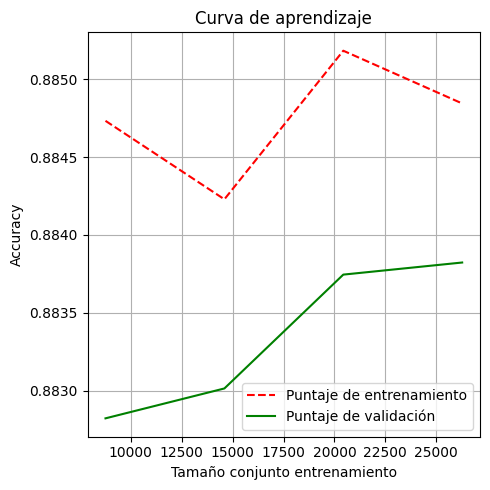

In [ ]:
lc_plot(logreg,Xtv,ytv)
plt.show()

## Árbol de decisión 

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=2)

In [ ]:
X_train = dftrain.drop([ 'IsBadBuy'], axis=1)
y_train = dftrain['IsBadBuy']
test_size = 0.3
val_size  = test_size/(1-test_size)
Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)

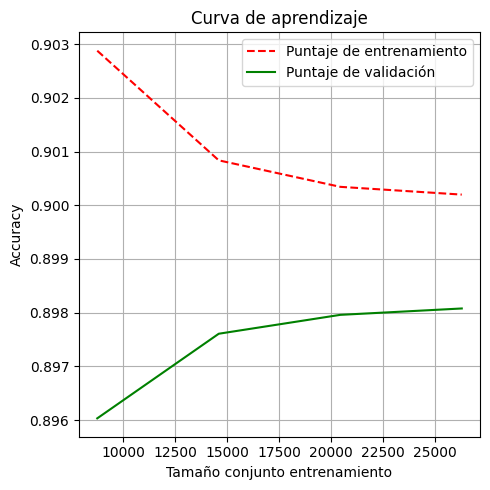

In [ ]:
lc_plot(decision_tree,Xtv,ytv)
plt.show()

## PCA + Regresión Logística

In [ ]:
from sklearn.decomposition import PCA

X_train = dftrain.drop([ 'IsBadBuy'], axis=1)
y_train = dftrain['IsBadBuy']
test_size = 0.3
val_size  = test_size/(1-test_size)
Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)

pca = PCA(n_components = 2)
X_t1 = pca.fit_transform(Xtv)
test_size = 0.3
val_size  = test_size/(1-test_size)
Xtv, Xts, ytv, yts = train_test_split(X_t1, ytv, test_size=test_size)
lr = LogisticRegression(max_iter=120,solver='newton-cholesky',class_weight='balanced')

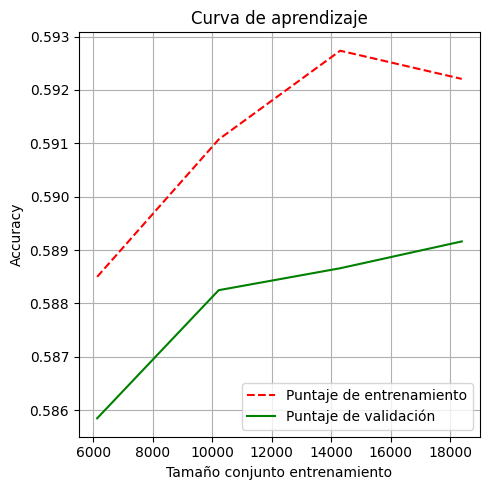

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
lc_plot(lr,Xtv,ytv)

## NMF + Árbol de decisión

In [ ]:
X_train = dftrain.drop([ 'IsBadBuy'], axis=1)
y_train = dftrain['IsBadBuy']
test_size = 0.3
val_size  = test_size/(1-test_size)
Xtv, xts, ytv, yts = train_test_split(X_train, y_train, test_size=test_size)
X2 = X_train

from sklearn.decomposition import NMF
nmf = NMF(n_components = 7)
X_t2 = nmf.fit_transform(X2)
test_size = 0.3
val_size  = test_size/(1-test_size)
Xtv, Xts, ytv, yts = train_test_split(X_t2, y_train, test_size=test_size)
Des_tree = DecisionTreeClassifier(class_weight='balanced',max_leaf_nodes=10,max_depth=15)

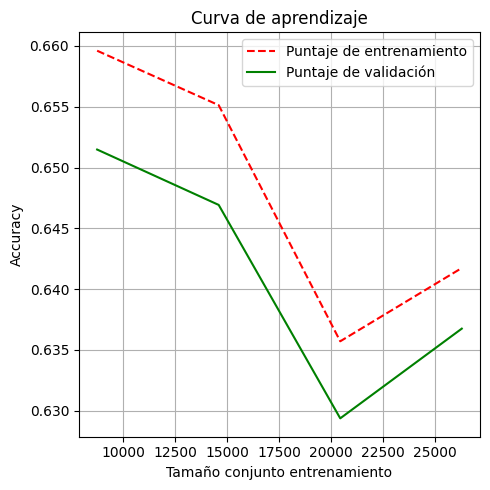

In [ ]:
lc_plot(Des_tree,Xtv,ytv)
plt.show()